In [ ]:
import pandas as pd
import re

# Load dataset
df = pd.read_csv('/content/netflix_titles.csv', encoding='ISO-8859-1')

# --------------------------------
# Step 1: Create 'year' column based on 'rating'
# --------------------------------
rating_to_year = {
    'G': 0, 'PG': 10, 'PG-13': 13, 'R': 17, 'NC-17': 18,
    'NR': 0, 'UR': 0, 'TV-Y': 0, 'TV-Y7': 7, 'TV-Y7-FV': 7,
    'TV-G': 0, 'TV-PG': 10, 'TV-14': 14, 'TV-MA': 17
}

# Map the 'rating' column to the new 'year' column
df['year'] = df['rating'].map(rating_to_year).fillna(0).astype(int)

# --------------------------------
# Step 2: Remove non-English words from 'description'
# --------------------------------
# Function to remove non-English words
def clean_description(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    # Keep only English characters (letters, numbers, punctuation)
    return re.sub(r'[^a-zA-Z0-9.,!?\'" ]', '', text)

# Apply cleaning function to 'description'
df['description'] = df['description'].apply(clean_description)

# --------------------------------
# Display cleaned data
# --------------------------------
print(df[['rating', 'year', 'description']].head(10))

# Optional: Save the cleaned data to a new CSV file
df.to_csv('/content/netflix_titles_cleaned.csv', index=False)


  rating  year                                        description
0  PG-13    13  As her father nears the end of his life, filmm...
1  TV-MA    17  After crossing paths at a party, a Cape Town t...
2  TV-MA    17  To protect his family from a powerful drug lor...
3  TV-MA    17  Feuds, flirtations and toilet talk go down amo...
4  TV-MA    17  In a city of coaching centers known to train I...
5  TV-MA    17  The arrival of a charismatic young priest brin...
6     PG    10  Equestria's divided. But a brighteyed hero bel...
7  TV-MA    17  On a photo shoot in Ghana, an American model s...
8  TV-14    14  A talented batch of amateur bakers face off in...
9  PG-13    13  A woman adjusting to life after a loss contend...


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv', encoding='ISO-8859-1')

In [ ]:
#data = pd.read_csv('/content/netflix_titles.csv', encoding='iso-8859-1')

In [ ]:
# Drop columns 'Unnamed: 12' to 'Unnamed: 19'
# df = df.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19','Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])
# Display the cleaned DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Fill missing values with 'Unknown' for director, cast, and country. Flag the missing values without losing any data (we can always drop missing values if wanted)
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Drop duplicate rows based on the 'title' column
df = df.drop_duplicates(subset=['title'], keep='first')


In [ ]:
print(df['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR' 'A']


In [ ]:
# rating= {
#     "G": "age >= 0",
#     "PG": "age >= 10",
#     "PG-13": "age >= 13",
#     "R": "age >= 17",
#     "NC-17": "age >= 18",
#     "NR": "Unknown",
#     "UR": "Unknown",
#     "TV-Y": "age >= 0",
#     "TV-Y7": "age >= 7",
#     "TV-Y7-FV": "age >= 7",
#     "TV-G": "age >= 0",
#     "TV-PG": "age >= 10",
#     "TV-14": "age >= 14",
#     "TV-MA": "age >= 17",
# }


In [ ]:
age_ratings_numeric = {
    "G": "age >= 0",
    "PG": "age >= 10",
    "PG-13": "age >= 13",
    "R": "age >= 17",
    "NC-17": "age >= 18",
    "NR": "Unknown",
    "UR": "Unknown",
    "TV-Y": "age >= 0",
    "TV-Y7": "age >= 7",
    "TV-Y7-FV": "age >= 7",
    "TV-G": "age >= 0",
    "TV-PG": "age >= 10",
    "TV-14": "age >= 14",
    "TV-MA": "age >= 17",
}


In [ ]:
df = df[df['rating'].isin(age_ratings_numeric.keys())]


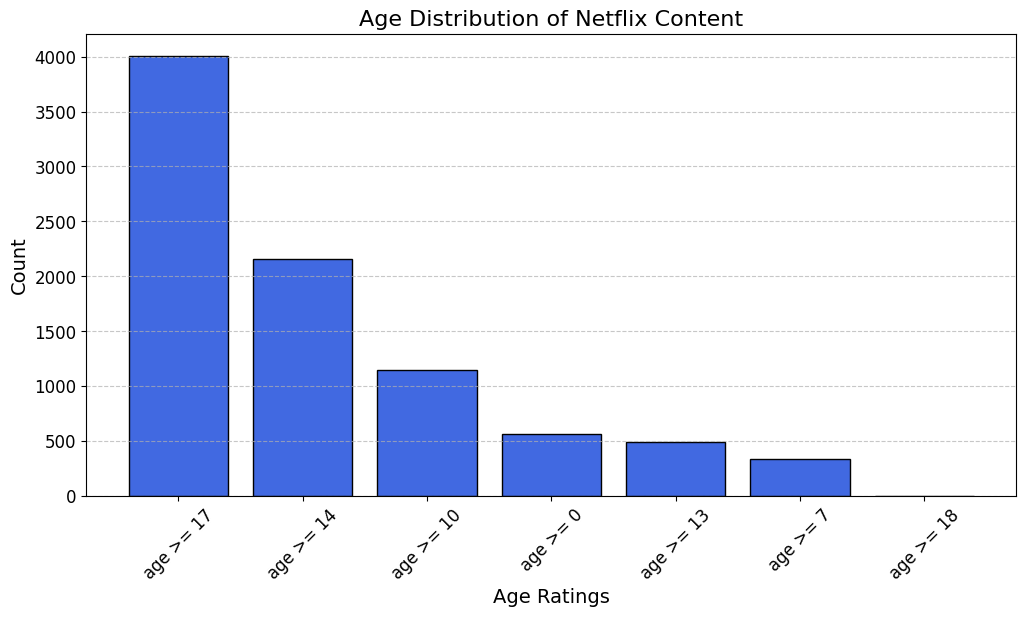

In [ ]:
df['age_numeric'] = df['rating'].map(age_ratings_numeric)

# Drop "Unknown" values
df = df[df['age_numeric'] != "Unknown"]

# Recalculate counts
age_counts = df['age_numeric'].value_counts()

# Plot
plt.figure(figsize=(12,6))
plt.bar(age_counts.index, age_counts.values, color='royalblue', edgecolor='black')
plt.xlabel("Age Ratings", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Age Distribution of Netflix Content", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



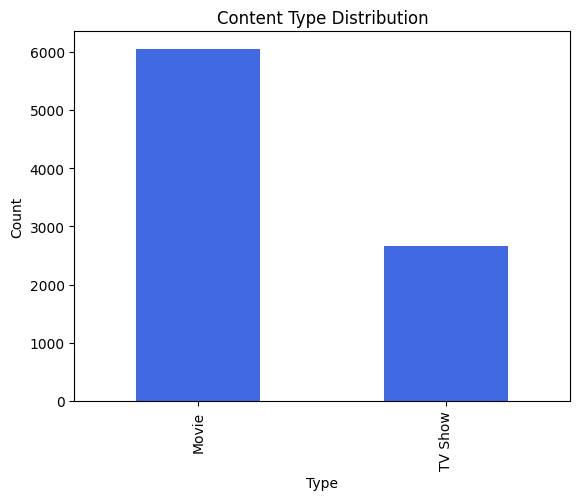

In [ ]:
content_type_distribution = df['type'].value_counts()

content_type_distribution.plot(kind='bar', color='royalblue')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import string


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_and_tokenize(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens


df["tokenized_description"] = df["description"].fillna("").apply(clean_and_tokenize)


df[["title", "tokenized_description"]].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,title,tokenized_description
0,Dick Johnson Is Dead,"[father, nears, end, life, filmmaker, kirsten,..."
1,Blood & Water,"[crossing, path, party, cape, town, teen, set,..."
2,Ganglands,"[protect, family, powerful, drug, lord, skille..."
3,Jailbirds New Orleans,"[feud, flirtation, toilet, talk, go, among, in..."
4,Kota Factory,"[city, coaching, center, known, train, finest,..."


In [ ]:
import pandas as pd
import spacy
import re
import string

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Prepare stopwords (combining spaCy + NLTK)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_spacy = spacy.lang.en.stop_words.STOP_WORDS
stopwords_nltk = set(stopwords.words('english'))
custom_stopwords = stopwords_spacy.union(stopwords_nltk)
custom_stopwords = custom_stopwords.union({"netflix", "series", "season"})

# Define preprocessing function
def preprocess_text_spacy(text):
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # remove non-ASCII
    text = text.strip()
    doc = nlp(text.lower())

    clean_tokens = []
    for token in doc:
        if (
            token.text not in custom_stopwords
            and token.text not in string.punctuation
            and re.search('[a-zA-Z0-9]', token.text)
        ):
            clean_tokens.append(token.lemma_)

    return clean_tokens

# Apply preprocessing
df['processed_description'] = df['description'].astype(str).apply(preprocess_text_spacy)

# Preview
print(df[['description', 'processed_description']].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   
5  The arrival of a charismatic young priest brin...   
6  Equestria's divided. But a bright-eyed hero be...   
7  On a photo shoot in Ghana, an American model s...   
8  A talented batch of amateur bakers face off in...   
9  A woman adjusting to life after a loss contend...   

                               processed_description  
0  [father, near, end, life, filmmaker, kirsten, ...  
1  [cross, path, party, cape, town, teen, set, pr...  
2  [protect, family, powerful, drug, lord, skille...  
3  [feuds, flirtation, toilet, talk, incarcerated...  
4  [city, coaching, center, know, train, india, f...  
5  [arrival, charismatic, young, priest, bring, g... 

### tfidf

In [ ]:
# Join tokens back into a single string so TF-IDF can handle them easily
df['processed_text_str'] = df['processed_description'].apply(lambda tokens: ' '.join(tokens))

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the TF-IDF vectorizer on the processed descriptions
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['processed_text_str'])
print("TF-IDF matrix shape:", X_tfidf.shape)  # (number of samples, number of features)

# Get some insights: average TF-IDF weight for each term across the corpus
avg_tfidf = np.mean(X_tfidf.toarray(), axis=0)
top_n = 20
top_indices = avg_tfidf.argsort()[-top_n:][::-1]
top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]
print("Top TF-IDF features:", top_features)

TF-IDF matrix shape: (8715, 15269)
Top TF-IDF features: ['life', 'young', 'find', 'family', 'woman', 'new', 'man', 'friend', 'love', 'world', 'year', 'take', 'help', 'documentary', 'school', 'old', 'try', 'home', 'father', 'story']


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/netflix_titles.csv', encoding='ISO-8859-1')

# Step 1: Extract Primary Genre
# Take the first genre listed as the 'primary genre'
df['genre'] = df['listed_in'].astype(str).apply(lambda x: x.split(',')[0].strip())

# Step 2: Clean Descriptions
def clean_description(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    return re.sub(r'[^a-zA-Z0-9.,!?\'" ]', '', text)

df['cleaned_description'] = df['description'].apply(clean_description)

# Step 3: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=3, max_df=0.9)
X = vectorizer.fit_transform(df['cleaned_description'])

# Step 4: Encode Genre Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['genre'])

# Check results
print("✅ Sample Data:")
print(df[['title', 'genre', 'cleaned_description']].head(5))


✅ Sample Data:
                   title                   genre  \
0   Dick Johnson Is Dead           Documentaries   
1          Blood & Water  International TV Shows   
2              Ganglands          Crime TV Shows   
3  Jailbirds New Orleans              Docuseries   
4           Kota Factory  International TV Shows   

                                 cleaned_description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  


In [ ]:
import pandas as pd

# 1) Load dataset
df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

# 2) Convert 'listed_in' to a list of genres
df['genre_list'] = df['listed_in'].astype(str).apply(lambda x: [g.strip() for g in x.split(',')])


In [ ]:
import re

def clean_description(text):
    if pd.isna(text):
        return ""
    # Remove non-alphanumeric except basic punctuation
    return re.sub(r'[^a-zA-Z0-9.,!?\'" ]', '', text)

df['cleaned_description'] = df['description'].apply(clean_description)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre_list'])  # shape: (num_samples, num_unique_genres)
genre_labels = mlb.classes_  # array of genre names


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=0.9)
X = vectorizer.fit_transform(df['cleaned_description'])  # shape: (num_samples, num_features)

print("Feature matrix shape:", X.shape)
print("Label matrix shape:", y.shape)


Feature matrix shape: (8809, 17008)
Label matrix shape: (8809, 48)


### model training part

In [ ]:
from sklearn.metrics import f1_score, make_scorer

def multi_label_f1_micro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

f1_micro_scorer = make_scorer(multi_label_f1_micro)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB


In [ ]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "NaiveBayes": MultinomialNB()
}


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
X_reduced = svd.fit_transform(X)  # use the output of TF-IDF

In [ ]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

# Extract the first genre from 'listed_in'
df['genre'] = df['listed_in'].astype(str).apply(lambda x: x.split(',')[0].strip())

# Clean the 'description' column
def clean_description(text):
    if pd.isna(text):
        return ""
    return re.sub(r'[^a-zA-Z0-9.,!?\'" ]', '', text)

df['cleaned_description'] = df['description'].apply(clean_description)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9
)
X = vectorizer.fit_transform(df['cleaned_description'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['genre'])


In [ ]:
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB


In [ ]:
from sklearn.pipeline import Pipeline

# 1) Logistic Regression + SVD
pipe_lr = Pipeline([
    ('svd', TruncatedSVD(n_components=300, random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1))
])

# 2) MultinomialNB + NMF (ensures non-negative features)
pipe_nb = Pipeline([
    ('nmf', NMF(n_components=50, init='random', random_state=42)),
    ('clf', MultinomialNB())
])

# 3) RandomForest + SVD
pipe_rf = Pipeline([
    ('svd', TruncatedSVD(n_components=300, random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# 4) XGBoost + SVD
pipe_xgb = Pipeline([
    ('svd', TruncatedSVD(n_components=300, random_state=42)),
    ('clf', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42, n_jobs=-1))
])


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer

def f1_micro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

f1_micro_scorer = make_scorer(f1_micro)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

models = {
    "LogisticRegression+SVD": pipe_lr,
    "MultinomialNB+NMF": pipe_nb,
    "RandomForest+SVD": pipe_rf,
    "XGBoost+SVD": pipe_xgb
}

for name, model_pipeline in models.items():
    scores = cross_val_score(
        model_pipeline,
        X,
        y,
        cv=kf,
        scoring=f1_micro_scorer,
        n_jobs=-1
    )
    print(f"Model: {name}")
    print(f"F1-micro (3-fold avg): {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print("-" * 50)


Model: LogisticRegression+SVD
F1-micro (3-fold avg): 0.3544 ± 0.0153
--------------------------------------------------
Model: MultinomialNB+NMF
F1-micro (3-fold avg): 0.1816 ± 0.0116
--------------------------------------------------
Model: RandomForest+SVD
F1-micro (3-fold avg): 0.3382 ± 0.0128
--------------------------------------------------
Model: XGBoost+SVD
F1-micro (3-fold avg): nan ± nan
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_

### clustering

In [ ]:
# Join tokens back into a single string so TF-IDF can handle them easily
df['processed_text_str'] = df['processed_description'].apply(lambda tokens: ' '.join(tokens))

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the TF-IDF vectorizer on the processed descriptions
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['processed_text_str'])
print("TF-IDF matrix shape:", X_tfidf.shape)  # (number of samples, number of features)

# Get some insights: average TF-IDF weight for each term across the corpus
avg_tfidf = np.mean(X_tfidf.toarray(), axis=0)
top_n = 20
top_indices = avg_tfidf.argsort()[-top_n:][::-1]
top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]
print("Top TF-IDF features:", top_features)

TF-IDF matrix shape: (8809, 15318)
Top TF-IDF features: ['life', 'young', 'find', 'family', 'woman', 'new', 'man', 'friend', 'love', 'world', 'year', 'take', 'help', 'documentary', 'school', 'old', 'try', 'home', 'father', 'story']


In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the processed descriptions
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=2, max_df=0.9)
X_tfidf_desc = vectorizer.fit_transform(df['processed_text_str'])  # Use processed description

# Perform KMeans clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf_desc)

# Assign cluster labels
df['cluster'] = clusters

# Display results
print("Cluster assignments (first 10):")
print(df[['title', 'processed_text_str', 'cluster']].head(10))

Cluster assignments (first 10):
                              title  \
0              Dick Johnson Is Dead   
1                     Blood & Water   
2                         Ganglands   
3             Jailbirds New Orleans   
4                      Kota Factory   
5                     Midnight Mass   
6  My Little Pony: A New Generation   
7                           Sankofa   
8     The Great British Baking Show   
9                      The Starling   

                                  processed_text_str  cluster  
0  father near end life filmmaker kirsten johnson...        4  
1  cross path party cape town teen set prove priv...        4  
2  protect family powerful drug lord skilled thie...        2  
3  feud flirtation toilet talk incarcerated woman...        1  
4  city coach center know train india fine colleg...        5  
5  arrival charismatic young priest bring gloriou...        1  
6  equestria divided bright eyed hero believe ear...        4  
7  photo shoot ghana ameri

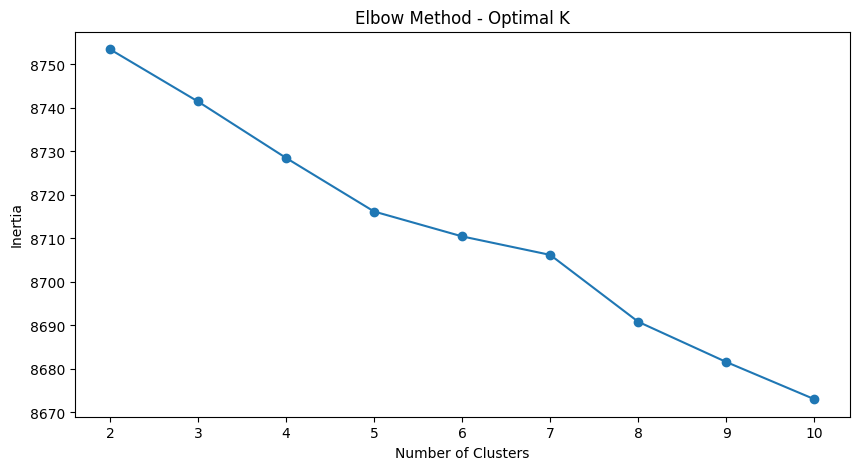

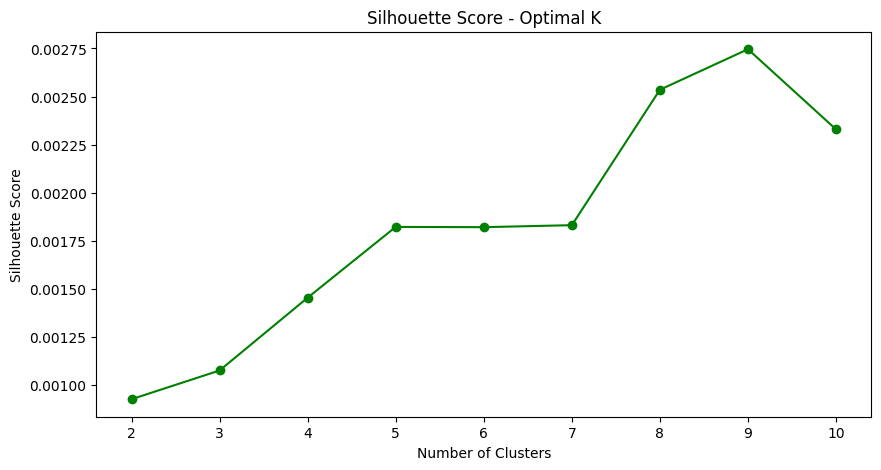

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 11):  # Test multiple cluster sizes
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf_desc)
    inertia.append(kmeans.inertia_)  # Elbow Method
    silhouette_scores.append(silhouette_score(X_tfidf_desc, kmeans.labels_))  # Silhouette Score

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the processed descriptions
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=2, max_df=0.9)
X_tfidf_desc = vectorizer.fit_transform(df['processed_text_str'])  # Use processed description

# Perform KMeans clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf_desc)

# Assign cluster labels
df['cluster'] = clusters

# Display results
print("Cluster assignments (first 10):")
print(df[['title', 'processed_text_str', 'cluster']].head(10))

Cluster assignments (first 10):
                              title  \
0              Dick Johnson Is Dead   
1                     Blood & Water   
2                         Ganglands   
3             Jailbirds New Orleans   
4                      Kota Factory   
5                     Midnight Mass   
6  My Little Pony: A New Generation   
7                           Sankofa   
8     The Great British Baking Show   
9                      The Starling   

                                  processed_text_str  cluster  
0  father near end life filmmaker kirsten johnson...        4  
1  cross path party cape town teen set prove priv...        4  
2  protect family powerful drug lord skilled thie...        2  
3  feud flirtation toilet talk incarcerated woman...        1  
4  city coach center know train india fine colleg...        5  
5  arrival charismatic young priest bring gloriou...        1  
6  equestria divided bright eyed hero believe ear...        4  
7  photo shoot ghana ameri

In [ ]:
# Display Sample Titles from Each Cluster
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster_id} Titles:")
    print(df[df['cluster'] == cluster_id][['title', 'processed_text_str']].head(5))

# Show Top Words in Each Cluster
from collections import Counter
import numpy as np

def get_top_words(cluster_num, top_n=10):
    cluster_text = " ".join(df[df['cluster'] == cluster_num]['processed_text_str'])
    word_counts = Counter(cluster_text.split())
    return dict(word_counts.most_common(top_n))

# Display the top words in each cluster
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster_id} Top Words:")
    print(get_top_words(cluster_id, top_n=10))


Cluster 0 Titles:
                          title  \
48                 Training Day   
82                      Lucifer   
84         Omo Ghetto: the Saga   
91   The Women and the Murderer   
122                  In the Cut   

                                    processed_text_str  
48   rookie cop day prove veteran lapd narcotic off...  
82   bore lord hell devil relocate los angeles open...  
84   twin reunite good hearted female gangster upti...  
91   documentary trace capture serial killer guy ge...  
122  embark affair cop probe murder young woman ins...  

Cluster 1 Titles:
                    title                                 processed_text_str
3   Jailbirds New Orleans  feud flirtation toilet talk incarcerated woman...
5           Midnight Mass  arrival charismatic young priest bring gloriou...
9            The Starling  woman adjust life loss contend feisty bird tak...
12           Je Suis Karl  family murder terrorist bombing young woman un...
24                  Jean

<ipython-input-45-720ce0401bad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='viridis')


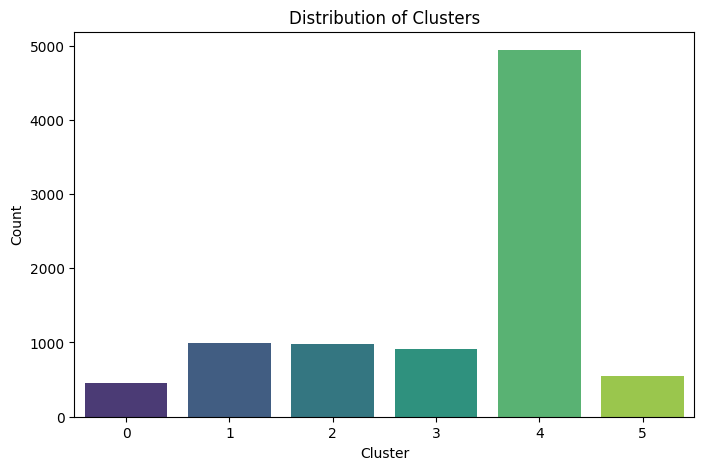

In [ ]:
# Plot the distribution of clustersimport seaborn as sns
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title("Distribution of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

### topic modeling

In [ ]:
### Topic Modeling
# Use Latent Dirichlet Allocation (LDA) on the TF-IDF matrix to discover topics.
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X_tfidf)
feature_names = vectorizer.get_feature_names_out()

print("\nTopics discovered:")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")


Topics discovered:
Topic 1: mischievous, growth, turn upside, haddish, retaliate, turf war, fair, undo, laga, flawed
Topic 2: flawed, mischievous, uncover dark, laga, fair, life star, turf war, undo, fast, leave family
Topic 3: consultant, undo, fair, mischievous, turn upside, turf war, flawed, leave family, fast, laga
Topic 4: flawed, turf war, leave family, familiar face, fast, fair, life star, undo, mischievous, laga
Topic 5: turn obsessive, leave family, undo, fair, mischievous, turn upside, turf war, life star, fast, laga


In [ ]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

# Extract the first genre from 'listed_in' and store in a new column 'genre'
df['genre'] = df['listed_in'].astype(str).apply(lambda x: x.split(',')[0].strip())

# Clean the 'description' column: remove unwanted characters
def clean_description(text):
    if pd.isna(text):
        return ""
    return re.sub(r'[^a-zA-Z0-9.,!?\'" ]', '', text).strip()

df['cleaned_description'] = df['description'].apply(clean_description)

# (Optional) Inspect the cleaned data
print(df[['title', 'genre', 'cleaned_description']].head(5))


                   title                   genre  \
0   Dick Johnson Is Dead           Documentaries   
1          Blood & Water  International TV Shows   
2              Ganglands          Crime TV Shows   
3  Jailbirds New Orleans              Docuseries   
4           Kota Factory  International TV Shows   

                                 cleaned_description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  


### prediction for type ( optional )

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1) Load dataset
df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

# 2) Clean the description
def clean_description(text):
    if pd.isna(text):
        return ""
    return re.sub(r'[^a-zA-Z0-9.,!?\'" ]', '', text).strip()

df['cleaned_description'] = df['description'].apply(clean_description)

# 3) Define target: "Movie" vs. "TV Show"
y = df['type']  # 'Movie' or 'TV Show'

# 4) TF-IDF vectorization of the cleaned descriptions
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=0.9)
X_tfidf = vectorizer.fit_transform(df['cleaned_description'])

# 5) Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42
)

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shapes: (7047, 17008) (1762, 17008) (7047,) (1762,)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

def classify_by_similarity(new_text, vectorizer, X_train, y_train, k=5):
    """
    Classify a new text as 'Movie' or 'TV Show' using similarity to training data.

    Parameters:
    - new_text: string (description to classify)
    - vectorizer: the fitted TfidfVectorizer
    - X_train: TF-IDF matrix for training descriptions
    - y_train: Series or array of labels ('Movie'/'TV Show') for training
    - k: number of neighbors to consider

    Returns:
    - predicted_type: the predicted label ('Movie' or 'TV Show')
    """
    # 1) Transform new text into TF-IDF vector
    new_vec = vectorizer.transform([new_text])

    # 2) Compute cosine similarity with each training sample
    sims = cosine_similarity(new_vec, X_train).flatten()

    # 3) Get indices of top-k neighbors (largest similarity)
    top_k_idx = np.argsort(sims)[::-1][:k]

    # 4) Majority vote among those k neighbors
    #    If y_train is a pandas Series, we can use .iloc;
    #    If y_train is a NumPy array, index it directly.
    if isinstance(y_train, pd.Series):
        top_k_labels = y_train.iloc[top_k_idx]
    else:
        top_k_labels = y_train[top_k_idx]

    # 5) Determine the most common label
    predicted_type = Counter(top_k_labels).most_common(1)[0][0]

    return predicted_type


### result

In [ ]:
# Example: A new description
new_description = "A gripping story of a detective unraveling mysteries in a futuristic world."

predicted_label = classify_by_similarity(
    new_text=new_description,
    vectorizer=vectorizer,
    X_train=X_train,
    y_train=y_train,
    k=5  # top-5 neighbors
)

print("Predicted label by similarity-based method:", predicted_label)


Predicted label by similarity-based method: Movie


In [ ]:
import pandas as pd
import re
import string

# Load the dataset
df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

# Fill missing values for columns we'll use
for col in ['listed_in', 'type', 'cast', 'description']:
    df[col] = df[col].fillna('')

# Combine features into a single text field
def combine_features(row):
    return f"{row['listed_in']} {row['type']} {row['cast']} {row['description']}"

df['combined_features'] = df.apply(combine_features, axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Vectorize the combined text
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# Example: Compute similarity for a query
query = "Comedy Movie Adam Sandler funny heartwarming family"
query_vec = vectorizer.transform([query])
similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
top_indices = np.argsort(similarities)[::-1][:5]
print("Top recommendations using TF-IDF:")
print(df.iloc[top_indices][['title', 'listed_in', 'type']])

TF-IDF matrix shape: (8809, 47360)
Top recommendations using TF-IDF:
                        title                           listed_in     type
4482  ADAM SANDLER 100% FRESH                     Stand-Up Comedy    Movie
1879          Hubie Halloween             Comedies, Horror Movies    Movie
6089    Adam Ruins Everything                         TV Comedies  TV Show
5639      Jim Gaffigan: Cinco                     Stand-Up Comedy    Movie
6271          Bedtime Stories  Children & Family Movies, Comedies    Movie


In [ ]:
import spacy

!python -m spacy download en_core_web_md

nlp = spacy.load("en_core_web_md")  # Using a medium model with pretrained vectors

def get_doc_vector(text):
    doc = nlp(text)
    # Average the token vectors (excluding stop words and punctuation)
    vectors = [token.vector for token in doc if token.has_vector and not token.is_stop and not token.is_punct]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(nlp.vocab.vectors_length)

# Compute document vectors for each title
df['doc_vector'] = df['combined_features'].apply(get_doc_vector)

# Create a matrix of document vectors
doc_vectors = np.stack(df['doc_vector'].values)

# Similarity example using word embeddings
query_vector = get_doc_vector(query)
from sklearn.metrics.pairwise import cosine_similarity
embedding_similarities = cosine_similarity([query_vector], doc_vectors).flatten()
top_indices_embed = np.argsort(embedding_similarities)[::-1][:5]
print("Top recommendations using Word Embeddings:")
print(df.iloc[top_indices_embed][['title', 'listed_in', 'type']])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Top recommendations using Word Embeddings:
                                             title  \
6039                               A Haunted House   
4010  Jeff Dunham's Very Special Christmas Special   
4009             Jeff Dunham: Minding the Monsters   
3733           Adam Devine: Best Time of Our Lives   
4474                                 Santo CachÃ³n   

                                            listed_in   type  
6039                          Comedies, Horror Movies  Movie  
4010                                  Stand-Up Comedy  Movie  
4009                      

In [ ]:
def recommend_titles(user_genre, user_type, user_actor, user_sentiment, user_description, top_n=5, method="tfidf"):
    """
    Recommend titles based on user inputs and similarity measure.

    Parameters:
      user_genre (str): Desired genre(s)
      user_type (str): 'Movie' or 'TV Show'
      user_actor (str): Actor/actress names
      user_sentiment (str): Sentiment descriptors (e.g., 'funny', 'heartwarming')
      user_description (str): Additional keywords
      top_n (int): Number of recommendations to return
      method (str): 'tfidf' or 'embedding' for similarity calculation

    Returns:
      DataFrame: Top recommended titles.
    """
    # Combine user inputs into a query string
    user_query = f"{user_genre} {user_type} {user_actor} {user_sentiment} {user_description}"

    if method == "tfidf":
        query_vec = vectorizer.transform([user_query])
        sims = cosine_similarity(query_vec, tfidf_matrix).flatten()
    elif method == "embedding":
        query_vec = get_doc_vector(user_query)
        sims = cosine_similarity([query_vec], doc_vectors).flatten()
    else:
        raise ValueError("Method must be either 'tfidf' or 'embedding'")

    top_indices = np.argsort(sims)[::-1][:top_n]
    return df.iloc[top_indices][['title', 'listed_in', 'type']], sims[top_indices]

# Test the recommendation function
user_genre = "Comedy"
user_type = "Movie"
user_actor = "Adam Sandler"
user_sentiment = "funny heartwarming"
user_description = "family vacation"
recommended_titles, sim_scores = recommend_titles(
    user_genre, user_type, user_actor, user_sentiment, user_description, top_n=5, method="tfidf"
)

print("Recommended Titles (TF-IDF):")
print(recommended_titles)
print("Similarity Scores:", sim_scores)


Recommended Titles (TF-IDF):
                        title                           listed_in     type
4482  ADAM SANDLER 100% FRESH                     Stand-Up Comedy    Movie
1879          Hubie Halloween             Comedies, Horror Movies    Movie
6089    Adam Ruins Everything                         TV Comedies  TV Show
5639      Jim Gaffigan: Cinco                     Stand-Up Comedy    Movie
6271          Bedtime Stories  Children & Family Movies, Comedies    Movie
Similarity Scores: [0.3720682  0.22767894 0.1952869  0.17793935 0.16485729]


### recommendation system

In [ ]:
# Example: user-based inputs to get recommendations

def recommend_titles(user_genre, user_type, user_actor, user_sentiment, user_description, top_n=5, method="tfidf"):
    """
    Return recommended titles based on user inputs and similarity measure.

    Parameters:
      user_genre (str): Desired genre(s)
      user_type (str): 'Movie' or 'TV Show'
      user_actor (str): Actor/actress name(s)
      user_sentiment (str): Sentiment descriptors (e.g., 'funny', 'heartwarming')
      user_description (str): Additional keywords
      top_n (int): Number of recommendations to return
      method (str): 'tfidf' or 'embedding' for similarity calculation

    Returns:f
    """
    # Combine the user inputs into a single query string
    user_query = f"{user_genre} {user_type} {user_actor} {user_sentiment} {user_description}"

    if method == "tfidf":
        # Vectorize the user query using the same TF-IDF vectorizer used for your dataset
        query_vec = vectorizer.transform([user_query])
        # Compute cosine similarity with the dataset's TF-IDF matrix
        sims = cosine_similarity(query_vec, X_tfidf).flatten()
    elif method == "embedding":
        # If you have an embedding-based approach, implement it here
        query_vec = get_doc_vector(user_query)  # e.g., spaCy or other embedding
        sims = cosine_similarity([query_vec], doc_vectors).flatten()
    else:
        raise ValueError("Method must be either 'tfidf' or 'embedding'")

    # Retrieve the indices of the most similar titles
    top_indices = np.argsort(sims)[::-1][:top_n]

    # Return the top_n recommendations and their similarity scores
    recommendations = df.iloc[top_indices][['title', 'listed_in', 'type']]
    return recommendations, sims[top_indices]


# ---------------------------
# Main code that prompts user input
# ---------------------------

if __name__ == "__main__":
    # Prompt user for inputs
    user_genre = input("Enter your preferred genre (e.g., 'Comedy'): ")
    user_type = input("Enter your preferred type (e.g., 'Movie' or 'TV Show'): ")
    user_actor = input("Enter an actor/actress name (optional): ")
    user_sentiment = input("Enter sentiment words (e.g., 'funny', 'heartwarming'): ")
    user_description = input("Enter additional description keywords: ")

    # Call the recommendation function
    recommended_titles, sim_scores = recommend_titles(
        user_genre=user_genre,
        user_type=user_type,
        user_actor=user_actor,
        user_sentiment=user_sentiment,
        user_description=user_description,
        top_n=5,             # Number of recommendations
        method="tfidf"       # or "embedding" if you have an embedding approach
    )

    # Display results
    print("\nRecommended Titles (TF-IDF):")
    print(recommended_titles)
    print("\nSimilarity Scores:")
    print(sim_scores)

Enter your preferred genre (e.g., 'Comedy'): comedy
Enter your preferred type (e.g., 'Movie' or 'TV Show'): movie
Enter an actor/actress name (optional): Adam Sandler
Enter sentiment words (e.g., 'funny', 'heartwarming'): funny heartwarming
Enter additional description keywords: family vacation


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 47360 while Y.shape[1] == 17008

In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assume you have these pre-defined:
# 1) df: Your Netflix dataset (DataFrame)
# 2) tfidf_matrix: TF-IDF matrix for df['combined_features'] or df['description']
# 3) vectorizer: The fitted TfidfVectorizer
# 4) doc_vectors: (Optional) for embedding approach
# 5) get_doc_vector: A function for embedding approach

def recommend_titles(user_genre, user_type, user_actor, user_sentiment, user_description, top_n=5, method="tfidf"):
    """
    Recommend titles based on user inputs and similarity measure.

    Parameters:
      user_genre (str): Desired genre(s)
      user_type (str): 'Movie' or 'TV Show'
      user_actor (str): Actor/actress names
      user_sentiment (str): Sentiment descriptors (e.g., 'funny', 'heartwarming')
      user_description (str): Additional keywords
      top_n (int): Number of recommendations to return
      method (str): 'tfidf' or 'embedding' for similarity calculation

    Returns:
      (DataFrame, np.ndarray): A tuple containing the top recommended titles
                               and their similarity scores.
    """
    # Combine user inputs into a query string
    user_query = f"{user_genre} {user_type} {user_actor} {user_sentiment} {user_description}"

    if method == "tfidf":
        # Vectorize the user query with the same TF-IDF vectorizer
        query_vec = vectorizer.transform([user_query])
        # Compute cosine similarity with the TF-IDF matrix of your dataset
        sims = cosine_similarity(query_vec, tfidf_matrix).flatten()
    elif method == "embedding":
        # If you have an embedding-based approach, convert user_query to embeddings
        query_vec = get_doc_vector(user_query)
        sims = cosine_similarity([query_vec], doc_vectors).flatten()
    else:
        raise ValueError("Method must be either 'tfidf' or 'embedding'")

    # Get indices of the top_n most similar titles
    top_indices = np.argsort(sims)[::-1][:top_n]

    # Return the recommended titles and their similarity scores
    return df.iloc[top_indices][['title', 'listed_in', 'type']], sims[top_indices]

# -------------------------------
# Main code prompting user input
# -------------------------------
if __name__ == "__main__":
    # Prompt user for inputs
    user_genre = input("Enter your preferred genre (e.g., 'Comedy'): ")
    user_type = input("Enter your preferred type (e.g., 'Movie' or 'TV Show'): ")
    user_actor = input("Enter an actor/actress name (optional): ")
    user_sentiment = input("Enter sentiment words (e.g., 'funny', 'heartwarming'): ")
    user_description = input("Enter additional keywords (optional): ")

    # Call the recommendation function
    recommended_titles, sim_scores = recommend_titles(
        user_genre=user_genre,
        user_type=user_type,
        user_actor=user_actor,
        user_sentiment=user_sentiment,
        user_description=user_description,
        top_n=5,             # Number of recommendations
        method="tfidf"       # or "embedding" if you have an embedding approach
    )

    # Display results
    print("\nRecommended Titles (TF-IDF):")
    print(recommended_titles)
    print("\nSimilarity Scores:")
    print(sim_scores)


Enter your preferred genre (e.g., 'Comedy'): comedy
Enter your preferred type (e.g., 'Movie' or 'TV Show'): movie
Enter an actor/actress name (optional): tom
Enter sentiment words (e.g., 'funny', 'heartwarming'): funny
Enter additional keywords (optional): vacation

Recommended Titles (TF-IDF):
                                 title  \
5639               Jim Gaffigan: Cinco   
5379     Tom Segura: Completely Normal   
3388         Jenny Slate: Stage Fright   
4184  Trigger Warning with Killer Mike   
2782              Tom Segura: Ball Hog   

                                     listed_in     type  
5639                           Stand-Up Comedy    Movie  
5379                           Stand-Up Comedy    Movie  
3388            Documentaries, Stand-Up Comedy    Movie  
4184  Docuseries, Stand-Up Comedy & Talk Shows  TV Show  
2782                           Stand-Up Comedy    Movie  

Similarity Scores:
[0.25348861 0.19996897 0.1802892  0.17971545 0.17850016]
